## Aim : Evaluate machine learning mechanisms for identifying the cyber security attacks using network traffic patterns

(1) The project uses Kegal dataset:
https://www.kaggle.com/datasets/vigneshvenkateswaran/bot-iot

(2) The original paper that discusses the various aspects of the data set and how its generated can be found in the followinng link:
https://unsw-my.sharepoint.com/:f:/g/personal/z5131399_ad_unsw_edu_au/EjlBDf2KODxPgXmqbO3MxxsBBVARCKZxGUG47OiFHb_AnQ

(3) The project is divided into following segments :<BR>
&nbsp;&nbsp;&nbsp;&nbsp;   a. Data Read <BR>
&nbsp;&nbsp;&nbsp;&nbsp;   b. Data Visualization <BR>
&nbsp;&nbsp;&nbsp;&nbsp;   c. Data cleaning + preparing it for ML traing & testing <BR>
&nbsp;&nbsp;&nbsp;&nbsp;   d. Applying ML <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      (d.1) Binary Classification : <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             - Using multiple ML techniques to evaluate best fit hyperparameter <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Training <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Testing <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Analysis of training and testing outcomes <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Conclusions <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      (d.2) Multiclass Classification : <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Using multiple ML techniques to evaluate best fit hyperparameter <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Training <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Testing <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Analysis of training and testing outcomes <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            - Conclusions <BR>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import time
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# (3.a) : Data Read :

In [ ]:

file_wfile = [ "/content/drive/MyDrive/Colab/Capstone/data/reduced_data_1.csv",
               "/content/drive/MyDrive/Colab/Capstone/data/reduced_data_2.csv",
               "/content/drive/MyDrive/Colab/Capstone/data/reduced_data_3.csv",
               "/content/drive/MyDrive/Colab/Capstone/data/reduced_data_4.csv" ]

tt_df = []

for fname in file_wfile :
     temp_df = pd.read_csv(fname, low_memory=False) # Col #7,8 have issues so setting low_memory = false
     #print(temp_df.head(10))
     tt_df.append(temp_df)

     # Concatenate all data frames in the list
     all_df = pd.concat(tt_df, ignore_index=True)

print(all_df.head(2))
all_df.info()

   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0        1  1.528089e+09    e            1   tcp             1   
1        2  1.528089e+09    e            1   arp             2   

             saddr  sport            daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.147  49960    192.168.100.7    80  ...             1.12704   
1    192.168.100.7     -1  192.168.100.147    -1  ...         15267.20000   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 96                75            1.133720   
1                  1                 2            0.005142   

   AR_P_Proto_P_Dport  Pkts_P_State_P_Protocol_P_DestIP  \
0            1.129970                               770   
1            0.005142                                 2   

   Pkts_P_State_P_Protocol_P_SrcIP  attack  category  subcategory  
0                              602       1       DoS         HTTP  
1                                6       1       DoS         HTTP  


# (3.b) Data Visualization
Check the classes available and evaluate how data is balanced between different classes

Group counts and percentages:
         category  group_count  group_percentage
0            DDoS      1926624         52.517717
1             DoS      1650260         44.984329
2          Normal          477          0.013003
3  Reconnaissance        91082          2.482798
4           Theft           79          0.002153


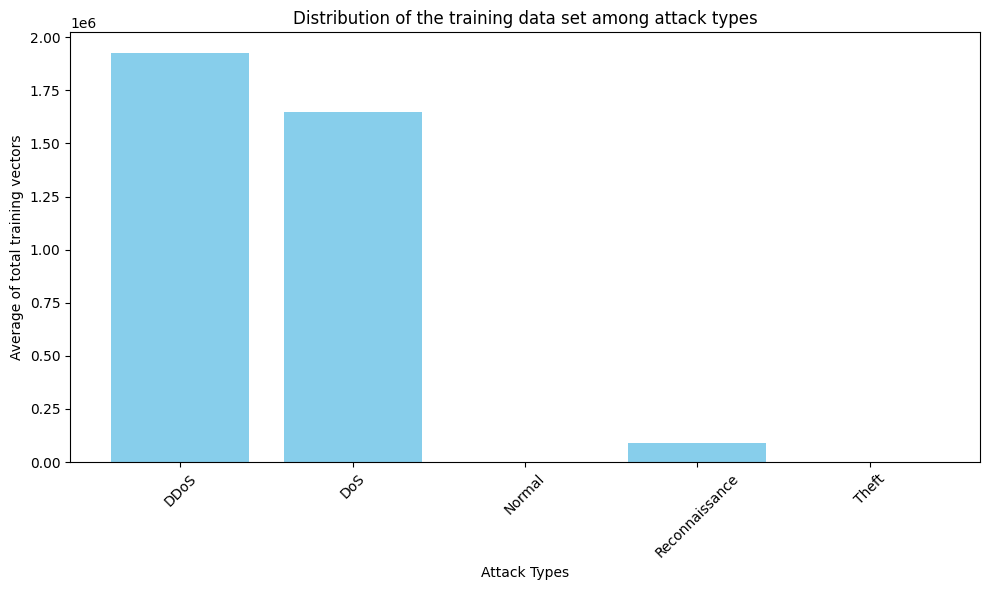

In [ ]:
## (3.b) Data Visualization
## Check the classes available and evaluate the data provided

# Count elements by group and subgroup
group_counts = all_df.groupby(['category']).size().reset_index(name='group_count')
# Calculate percentages
total_groups = group_counts['group_count'].sum()
group_counts['group_percentage'] = (group_counts['group_count'] / total_groups) * 100

print("Group counts and percentages:")
print(group_counts)

#print the vectors for each category of attack
grouped_cats = all_df.groupby(['category']).size()

grouped_info = pd.DataFrame()
grouped_info['CATEGORY'] = grouped_cats.index
grouped_info['NUM_VECTORS'] = grouped_cats.values
grouped_info['PERCENTAGE'] = round((grouped_info['NUM_VECTORS']/grouped_info['NUM_VECTORS'].sum())*100, 4)

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(grouped_info['CATEGORY'], grouped_info['NUM_VECTORS'], color='skyblue')

# Adding labels and title
plt.xlabel('Attack Types')
plt.ylabel('Average of total training vectors')
plt.title('Distribution of the training data set among attack types')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout
plt.show()

##grouped_info.to_csv('data_v.csv', mode='a', header=True, index=False)

In [ ]:
subgroup_counts = all_df.groupby(['category', 'subcategory']).size().reset_index(name='subgroup_count')

total_subgroups = subgroup_counts.groupby('category')['subgroup_count'].sum().reset_index(name='total_subgroup_count')
subgroup_counts = subgroup_counts.merge(total_subgroups, on='category')
subgroup_counts['subgroup_percentage'] = (subgroup_counts['subgroup_count'] / subgroup_counts['total_subgroup_count']) * 100

# Drop the total_subgroup_count column
subgroup_counts = subgroup_counts.drop(columns=['total_subgroup_count'])

print("\nSubgroup counts:")
print(subgroup_counts)


Subgroup counts:
          category        subcategory  subgroup_count  subgroup_percentage
0             DDoS               HTTP             989             0.051333
1             DDoS                TCP          977380            50.730189
2             DDoS                UDP          948255            49.218478
3              DoS               HTTP            1485             0.089986
4              DoS                TCP          615800            37.315332
5              DoS                UDP         1032975            62.594682
6           Normal             Normal             477           100.000000
7   Reconnaissance     OS_Fingerprint           17914            19.667991
8   Reconnaissance       Service_Scan           73168            80.332009
9            Theft  Data_Exfiltration               6             7.594937
10           Theft         Keylogging              73            92.405063


# Priliminary Data Anaysis :

### Categories of data :  

As seen from the two tables and previously analyzed detailed info of the input data, it is clear that apart from the ATTACK vs NORMAL classification, the attack traffic has also been classified as the DOS, DDOS, RECONAISSANCE and THEFT categories.

So planning to use the two methods :

Binary classification to identify attack vs normal traffic
Multi-Class classification to identify the type of attack traffic.

Such classification definately helps in taking preventive measures in cyber security.

### Unbalanced Data:
From the above analysis, its clear that the data is unbalanced for "Theft" and "Normal" class ! Lets evaluate if the classifiers work well for this or not? Also do we need to use stratified split for splitting the data? Trying with normal split first and then evaluate the need for stratified split

# Visualization Continued :
Need to eveluate now what parameters clearly classify the ATTACK vs NON-ATTACK

Evaluating the violin plots for number of columns =  30


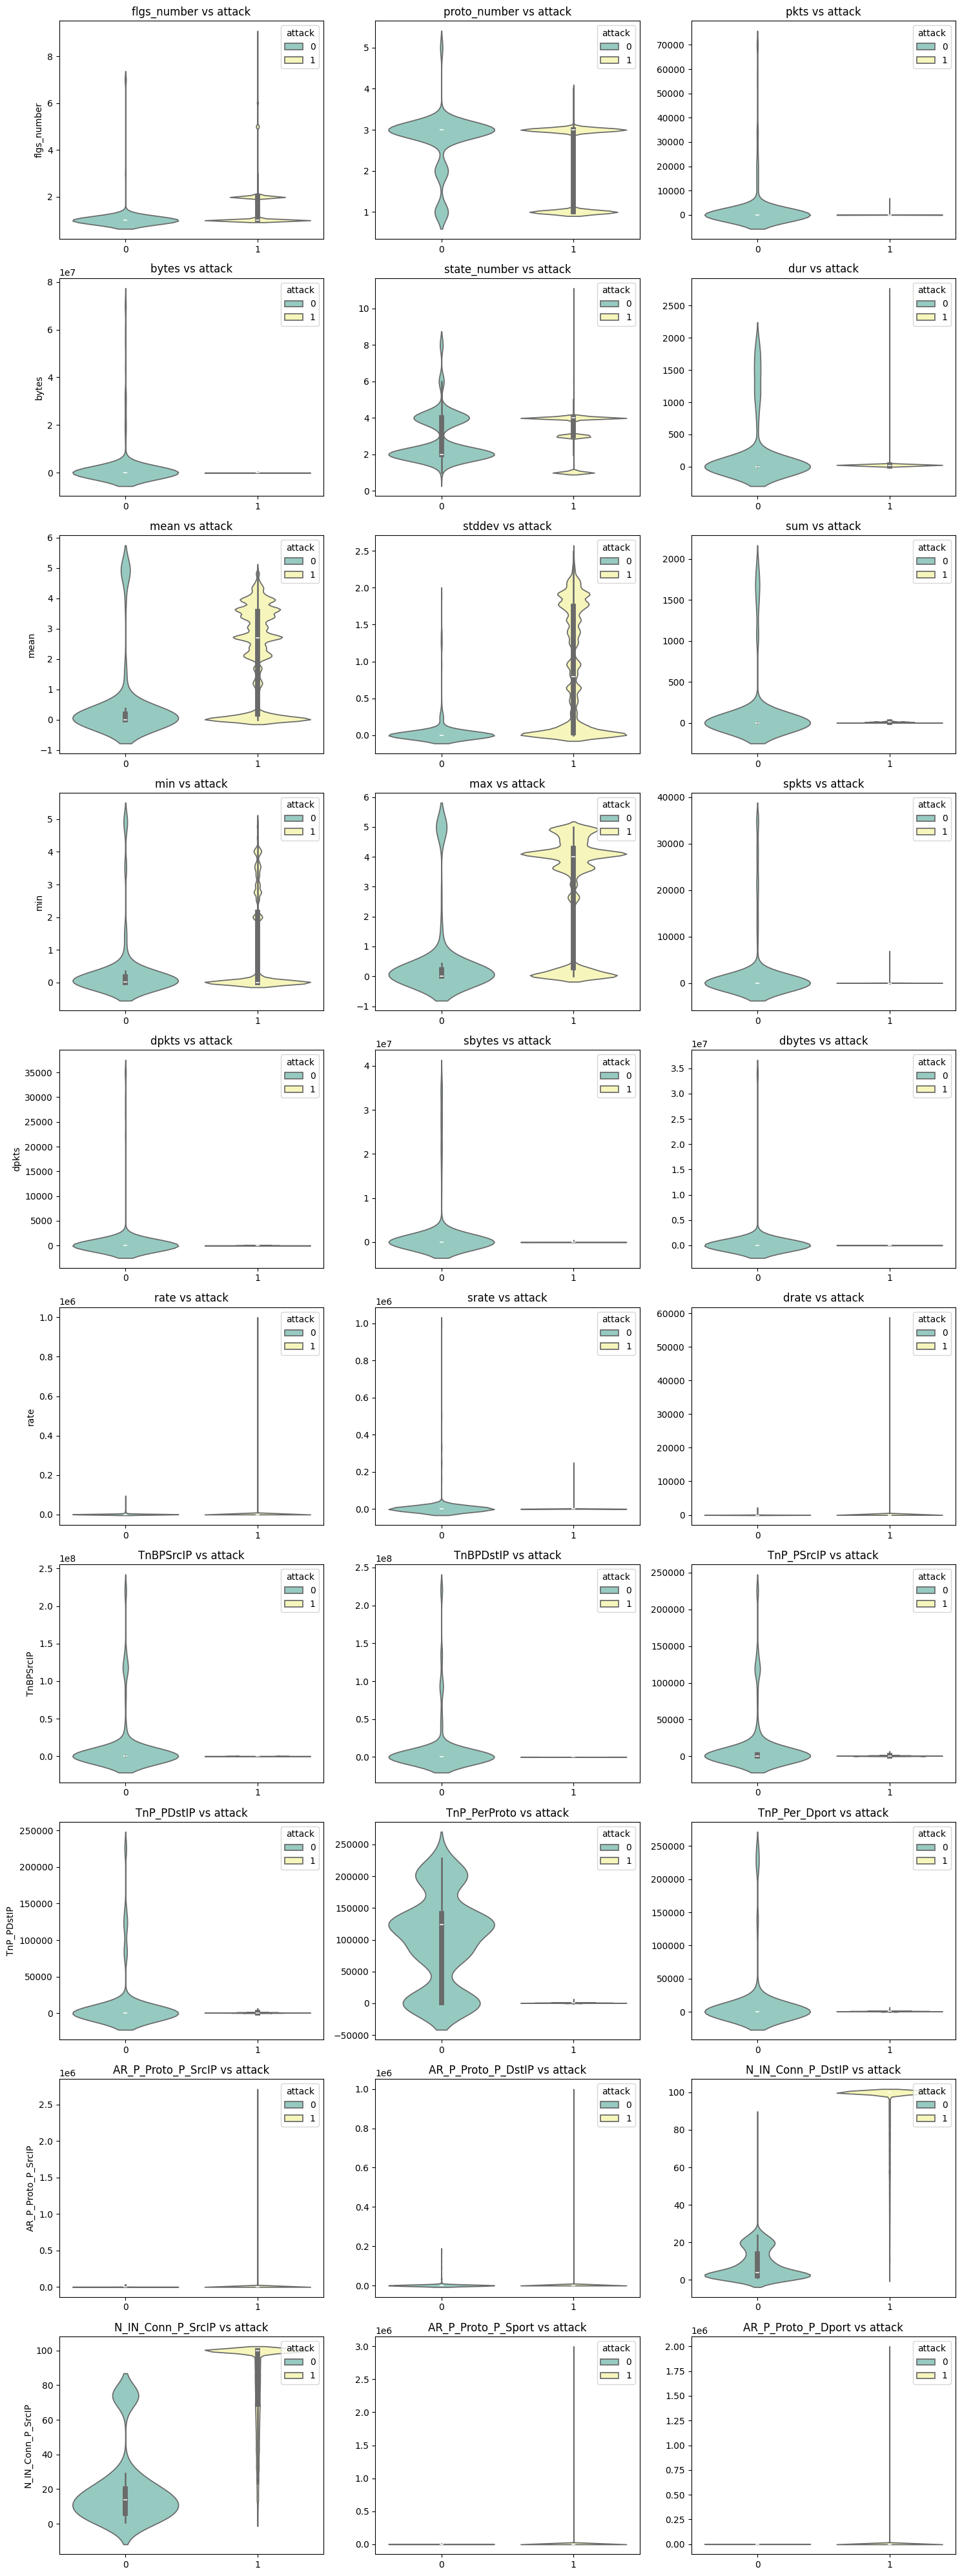

In [ ]:

vi_df = pd.DataFrame(all_df)

# Convert 'y' column to categorical for better visualization
vi_df['attack'] = all_df['attack'].astype('category')

#print (vi_df.info())

vi_df.drop(["pkSeqID", "category", "subcategory", "proto", "state", "flgs", "seq", "saddr", "daddr", "sport", "dport",
            "stime", "ltime", ], inplace=True, axis=1)

num_columns = vi_df.shape[1] - 3
print ("Evaluating the violin plots for number of columns = ", num_columns)
num_rows = (num_columns + 2) // 3  # Calculate number of rows needed
# Plotting violin plots in a matrix of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten axes for easier iteration

for i, col in enumerate(vi_df.columns[:-3]):  # Exclude 'y' column
    ax = axes[i]
    sns.violinplot(x='attack', y=col, data=vi_df, hue="attack", palette='Set3', split=False, ax=ax)
    ax.set_title(f'{col} vs attack')
    ax.set_xlabel('')
    if i % 3 != 0:
        ax.set_ylabel('')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Violin Plot Analysis :  
From the above analysis, it is clear that few inputs clearly split the attack vs non-attack traffic

The TnP_Per_Proto, N_IN_Conn_P_SrcIP, N_IN_Conn_P_DstIP graphs clearly show ability of spliting the output to Attack vs Non-Attack.

Lets evaluate these in time graph using pairplots

## SNS Pairplots to analyze the trffic further :
As DOS and DDOS categories have the most of the vectors, the performance of the classifier will be determined by these categories.

As per the paper as well, the derived columns like N_IN_Conn_P_Dst/SRCIP and TnP_Per_Proto does influence the decision, try to visualize the data based on these two heavily loaded classes (DoS and DDoS)

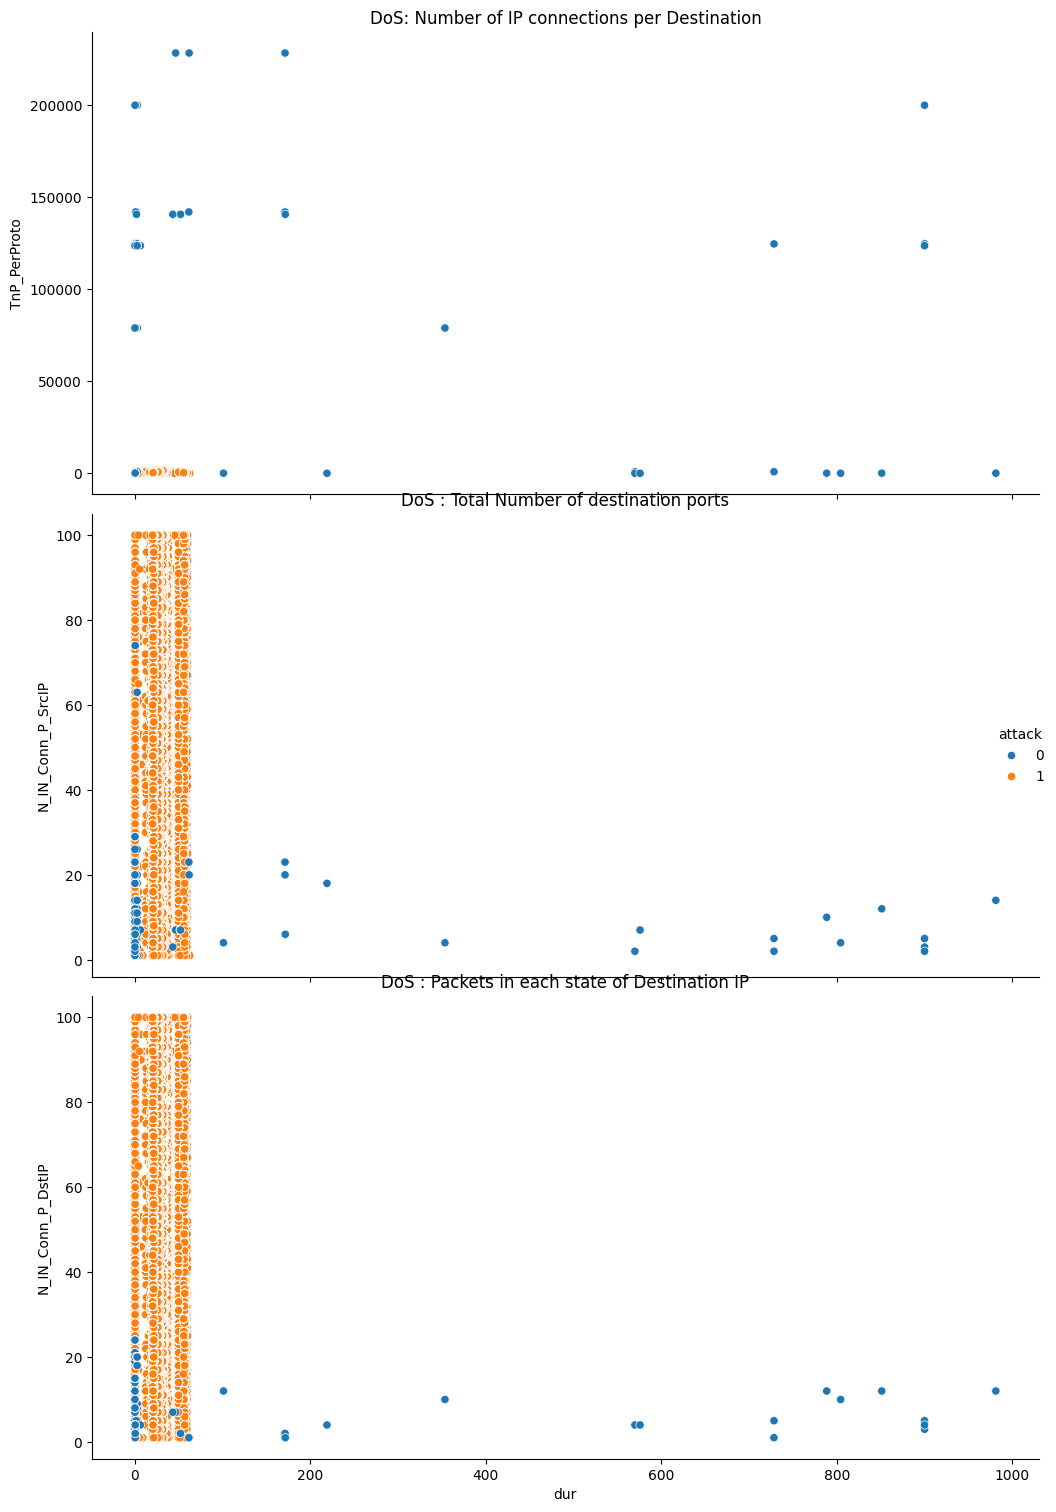

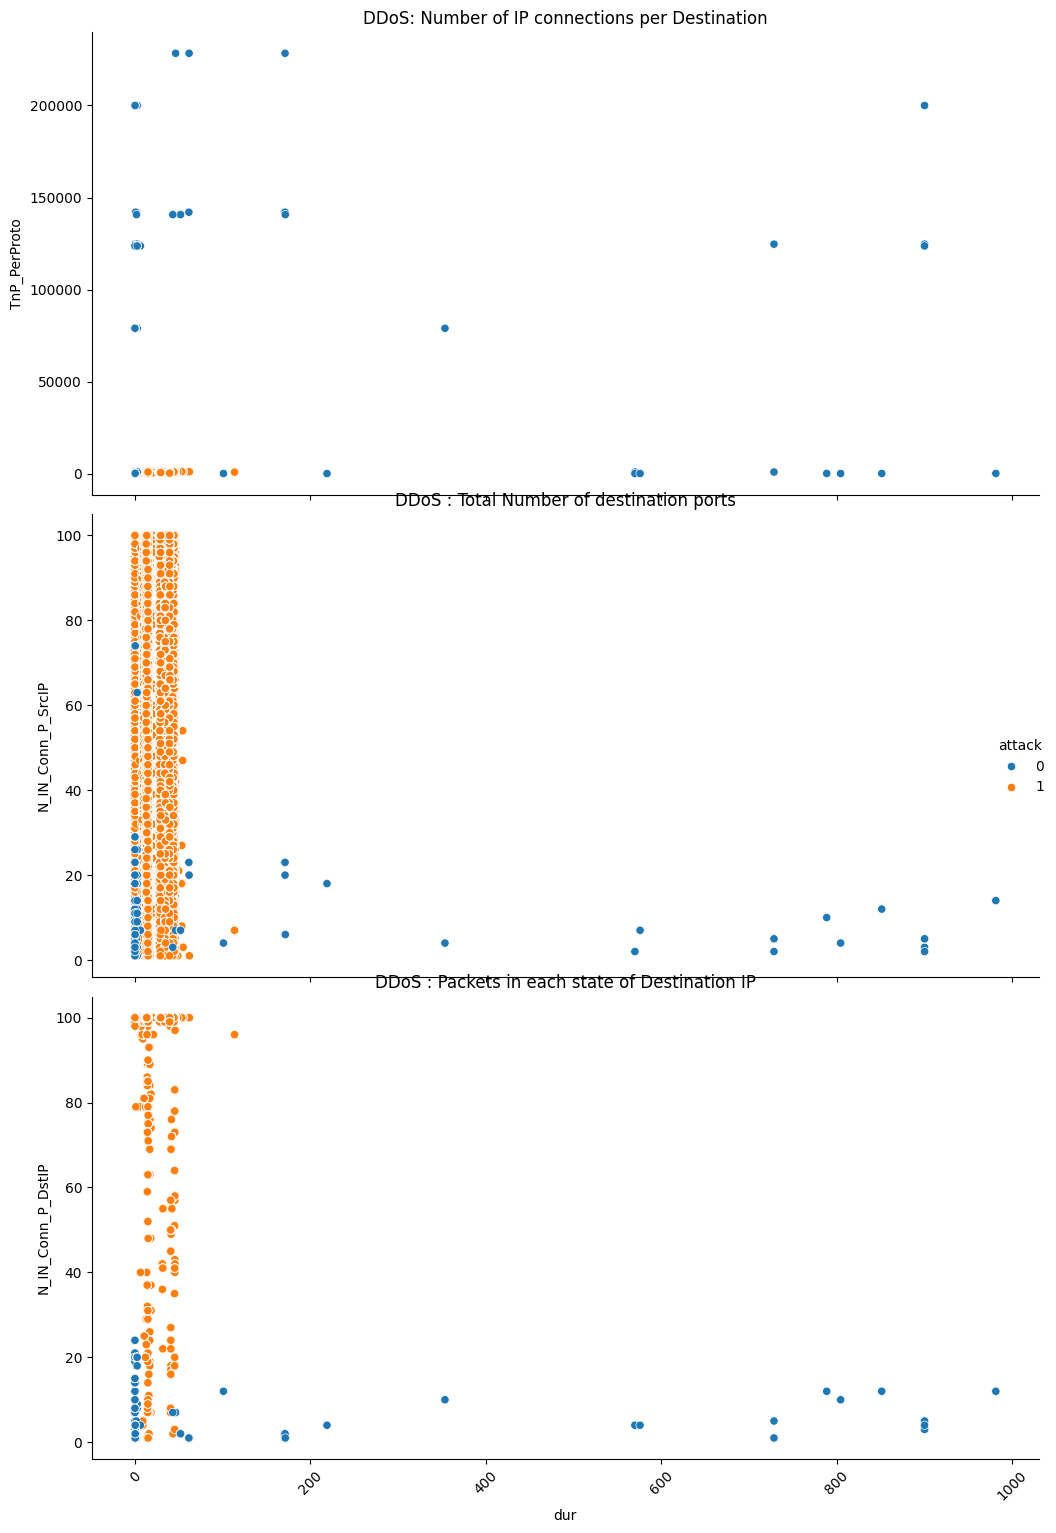

In [ ]:

# Group them based on sub-category of DOS Attacks
grouped_dos_tcp = all_df[((all_df['category']=="Normal") | ((all_df['category'] == "DoS"))) & (all_df['TnP_Per_Dport']<5000) & (all_df['dur']<1000)]
grouped_ddos_tcp = all_df[((all_df['category']=="Normal") | ((all_df['category'] == "DDoS"))) & (all_df['TnP_Per_Dport']<5000) & (all_df['dur']<1000)]

plot1 = sns.pairplot(grouped_dos_tcp, x_vars=['dur'], y_vars=['TnP_PerProto', 'N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP'], kind='scatter',  height=5, aspect=2, hue='attack')
plt.tight_layout()  # Adjust layout

plot2 = sns.pairplot(grouped_ddos_tcp, x_vars=['dur'], y_vars=['TnP_PerProto', 'N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP'], kind='scatter',  height=5, aspect=2, hue='attack')
plt.tight_layout()  # Adjust layout

#plot3 = sns.pairplot(grouped_recon_tcp, x_vars=['dur'], y_vars=['N_IN_Conn_P_DstIP', 'TnP_Per_Dport', 'TnP_PDstIP'], kind='scatter',  height=5, aspect=2, hue='attack')
#plt.tight_layout()  # Adjust layout

# Set titles for each subplot
titles = ['DoS: Number of IP connections per Destination', 'DoS : Total Number of destination ports', 'DoS : Packets in each state of Destination IP']
for ax, title in zip(plot1.axes.flat, titles):
    ax.set_title(title)

titles = ['DDoS: Number of IP connections per Destination', 'DDoS : Total Number of destination ports', 'DDoS : Packets in each state of Destination IP']
for ax, title in zip(plot2.axes.flat, titles):
    ax.set_title(title)

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()
#plt.savefig("DealWithConnections.png")

## Analysis of Pairplots:

From the above graphs, it is clear that classifier will be able to distinguish and create boundaries for attack vs nonattack traffic based on these parameters. Lets evaluate this now using classifiers

# 3.c : Data Processing & clean up

Data is very clean and does not have any empty or NULL cells.
Data has categorical columns so

In [ ]:


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Claen up all values so that CatBoost only receives integers and string variables
# Remove . from source and dest IP addresses and make then single int variables

print ("Preparing training, testing and reference vectors\n")

## Ensure time is considerd as int
all_df['stime'] = all_df['stime'].astype(int)
## All S and D addresses to be just strings => These are useless parameters
## will be avoided in training
all_df['saddr'] = all_df['saddr'].str.replace('.', '')
all_df['saddr'] = all_df['saddr'].str.replace(':', '')
all_df['saddr'] = all_df['saddr'].str.replace('::', '')

all_df['daddr'] = all_df['daddr'].str.replace('.', '')
all_df['daddr'] = all_df['daddr'].str.replace(':', '')
all_df['daddr'] = all_df['daddr'].str.replace('::', '')

## Replace any spaces with nulls and keep these as string type
all_df['flgs'] = all_df['flgs'].str.replace(r'\s+', '', regex=True)

## Suggested Cleanup
matching_rows = all_df[all_df['proto'] == "icmp"]

# Replace values in 'column2' for the matching rows
all_df.loc[matching_rows.index, 'sport'] = -1
all_df.loc[matching_rows.index, 'dport'] = -1

matching_rows=[]

## Replace the label of ARP to normal
matching_rows = all_df[all_df['proto'] == 'arp']

## For now not, changing the Category to Normal for ARP
## print (len(all_df[all_df['proto'] == 'arp'])
#all_df.loc[matching_rows.index, 'attack'] = 0
#all_df.loc[matching_rows.index, 'category'] = "Normal"
#print(all_df[all_df['proto'] == 'arp'])
#all_df['pkts'] = all_df['pkts'].astype(int)
#all_df['bytes'] = all_df['bytes'].astype(int)

label_encoder = LabelEncoder()

all_df['a_type'] = label_encoder.fit_transform(all_df['category'])
#mapping_table = dict(zip(label_encoder.classes_, all_df['a_type']))

# Create the consolidated mapping vector
consolidated_mapping = {label1: label2 for label1, label2 in zip(all_df['a_type'], all_df['category'])}
# Create DataFrame from dictionary
mapped_df = pd.DataFrame.from_dict(consolidated_mapping, orient='index', columns=['Vector2'])
# Rename the index column to 'Vector1'
mapped_df.index.name = 'Vector1'

all_df['a_subtype'] = label_encoder.fit_transform(all_df['subcategory'])

# Create the consolidated mapping vector
sub_consolidated_mapping = {sublabel1: sublabel2 for sublabel1, sublabel2 in zip(all_df['a_subtype'], all_df['subcategory'])}
# Create DataFrame from dictionary
submapped_df = pd.DataFrame.from_dict(consolidated_mapping, orient='index', columns=['Vector2'])
# Rename the index column to 'Vector1'
submapped_df.index.name = 'Vector1'

## Dropping following parameters as
## (1) flgs, state, proto has euqivalent labels
## (2) Ignore saddr, dadder, sport and dport as these values as these can change drastically for different networks
## (3) pktSeqID is just a serial number so ignoring it
## (4) Ignoring all Y components

X_pre = all_df.drop(["pkSeqID", "attack", "category", "subcategory", "a_type", "a_subtype", "proto", "state", "flgs", "seq", "saddr", "daddr", "sport", "dport"], axis=1)
## If attack type is classified or use Label

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to the selected columns
X_scaled = scaler.fit_transform(X_pre)

X = pd.DataFrame(X_scaled, columns=X_pre.columns)

Y_b = all_df['attack']
Y_m = all_df['a_type']

#print (all_df.nunique())
print (mapped_df)
print(X.info())

Preparing training, testing and reference vectors

                Vector2
Vector1                
1                   DoS
0                  DDoS
2                Normal
3        Reconnaissance
4                 Theft
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   stime                             float64
 1   flgs_number                       float64
 2   proto_number                      float64
 3   pkts                              float64
 4   bytes                             float64
 5   state_number                      float64
 6   ltime                             float64
 7   dur                               float64
 8   mean                              float64
 9   stddev                            float64
 10  sum                               float64
 11  min                               float64
 12  max  


### Splitting data for binary and multiclass classification training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, Y_b, test_size=0.5, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, Y_m, test_size=0.3, random_state=42)


### Defining the performance matrix evaluation functions

In [ ]:
import math

def floor_with_capped_decimals(x):
    # Multiply x by 100, take the floor, then divide by 100
    return math.floor(x * 100) / 100

def calculate_metrics(CM):
    TP = CM[1][1]
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fpr = FP / (FP + TN)

    return accuracy, recall, precision, f1_score, fpr


def calculate_metrics_mult(CM):

  # Calculate TP, FP, FN, TN for each class
  num_classes = CM.shape[0]
  metrics = {}

  for i in range(num_classes):
    TP = CM[i, i]
    FP = np.sum(CM[:, i]) - TP
    FN = np.sum(CM[i, :]) - TP
    TN = np.sum(CM) - TP - FP - FN

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    fpr = FP / (FP + TN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.trace(CM) / np.sum(CM)

    metrics[f'Class {i}'] = {'Precision': precision,
                             'Recall': recall,
                             'FPR': fpr,
                             'F1 Score': f1_score}

  # Overall metrics (weighted or macro-average)
  overall_precision = np.mean([metrics[f'Class {i}']['Precision'] for i in range(num_classes)])
  overall_recall = np.mean([metrics[f'Class {i}']['Recall'] for i in range(num_classes)])
  overall_fpr = np.mean([metrics[f'Class {i}']['FPR'] for i in range(num_classes)])
  overall_f1_score = np.mean([metrics[f'Class {i}']['F1 Score'] for i in range(num_classes)])

  print(f'Overall Precision: {overall_precision}')
  print(f'Overall Recall: {overall_recall}')
  print(f'Overall FPR: {overall_fpr}')
  print(f'Overall F1 Score: {overall_f1_score}')
  print(f'Accuracy: {accuracy}')

  return accuracy, overall_recall, overall_precision, overall_f1_score, overall_fpr

#def plot_confusion_matrix(model_name, y_true, y_pred, title, results_fetEng_hyp, train_time, test_time, train_accuracy, test_accuracy) :
def plot_confusion_matrix(bin_mult, model_name, y_true, y_pred, title, results, train_time, test_time, train_accuracy, test_accuracy) :
    cm = confusion_matrix(y_true, y_pred)

    if(bin_mult==0) :
      acc, rec, prec, f1, fpr = calculate_metrics(cm)
    else :
      acc, rec, prec, f1, fpr = calculate_metrics_mult(cm)

    print("Accuracy:", floor_with_capped_decimals(acc*100))
    print("Recall:", floor_with_capped_decimals(rec*100))
    print("Precision:", floor_with_capped_decimals(prec*100))
    print("F1 Score:", floor_with_capped_decimals(f1*100))
    print("False Positive Rate:", floor_with_capped_decimals(fpr*100))

    results.append([model_name, train_time, floor_with_capped_decimals(train_accuracy*100), test_time, floor_with_capped_decimals(test_accuracy*100), floor_with_capped_decimals(rec*100),
                    floor_with_capped_decimals(prec*100), floor_with_capped_decimals(f1*100), floor_with_capped_decimals(fpr*100)])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.tight_layout()
    plt.show()

### Include all the relevant libraries required for classifiers to be used

In [ ]:
## Get all classifier models included here
#from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
import xgboost as xgb

use_best_model = True
plot_en = False
class_wt = 0

### Training using Gridsearch of hyperparameters

### Evaluate Gridsearch of hyperparameters for multiclass classification

In [ ]:
print ("===== Running MultiClass Classification Section =====\n")

results_mult = []
title_mult = "Multi-Class Classification"

# Define classifiers
classifiers_multi = {
    'Logistic_Regr': LogisticRegression(max_iter=5000, multi_class='ovr'),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(random_state=42),
    'XGBoost_Cl' : xgb.XGBClassifier(objective='multi:softmax', num_class=5),
    'Neural_Net': MLPClassifier(max_iter=1000, random_state=42)
}

# Hyperparameter grids for GridSearchCV
param_grids_multi = {
    'Logistic_Regr': {'C': [0.1, 1]},
    'KNN': {'n_neighbors': [3, 5]},
    'Decision_Tree': {'max_depth': [5, 10, 15]},
    'Random_Forest': {'n_estimators': [50, 75, 150]},
    'XGBoost_Cl' : {'n_estimators': [150, 200], 'learning_rate': [0.1, 0.05]},
    'Neural_Net': {'hidden_layer_sizes': [(100,), (50, 50)]}
}

# Perform GridSearchCV for each classifier
best_params_multi = {}
for clf_name, clf in classifiers_multi.items():
    print ("Evluating best parameters for ", clf_name)
    grid_search = GridSearchCV(clf, param_grids_multi[clf_name], cv=5, scoring='accuracy')
    print ("Starting to fit the grid search for ", clf_name)
    grid_search.fit(X_train_m, y_train_m)
    print ("End of grid search evaluation for ", clf_name)
    best_params_multi[clf_name] = grid_search.best_params_

# Print best parameters found by GridSearchCV
for clf_name, params in best_params_multi.items():
    print(f"Best parameters for {clf_name}: {params}")


===== Running MultiClass Classification Section =====

Evluating best parameters for  Logistic_Regr
Starting to fit the grid search for  Logistic_Regr
End of grid search evaluation for  Logistic_Regr
Evluating best parameters for  Decision_Tree
Starting to fit the grid search for  Decision_Tree
End of grid search evaluation for  Decision_Tree
Evluating best parameters for  Random_Forest
Starting to fit the grid search for  Random_Forest
End of grid search evaluation for  Random_Forest
Evluating best parameters for  XGBoost_Cl
Starting to fit the grid search for  XGBoost_Cl
End of grid search evaluation for  XGBoost_Cl
Evluating best parameters for  Neural_Net
Starting to fit the grid search for  Neural_Net
End of grid search evaluation for  Neural_Net
Best parameters for Logistic_Regr: {'C': 1}
Best parameters for Decision_Tree: {'max_depth': 15}
Best parameters for Random_Forest: {'n_estimators': 75}
Best parameters for XGBoost_Cl: {'learning_rate': 0.1, 'n_estimators': 200}
Best para

### Using best hyperparameters for training and testing of different classifiers

Best parameters for Logistic_Regr: {'C': 1}
Best parameters for Decision_Tree: {'max_depth': 15}
Best parameters for Random_Forest: {'n_estimators': 75}
Best parameters for XGBoost_Cl: {'learning_rate': 0.1, 'n_estimators': 200}
Best parameters for Neural_Net: {'hidden_layer_sizes': (100,)}


<ipython-input-20-63a1db34b692>:31: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * recall) / (precision + recall)


Overall Precision: 0.7986780746157003
Overall Recall: 0.7517796045998889
Overall FPR: 0.001264358427370084
Overall F1 Score: nan
Accuracy: 0.9969042948252567
Accuracy: 99.69
Recall: 75.18
Precision: 79.87
F1 Score: nan
False Positive Rate: 0.13


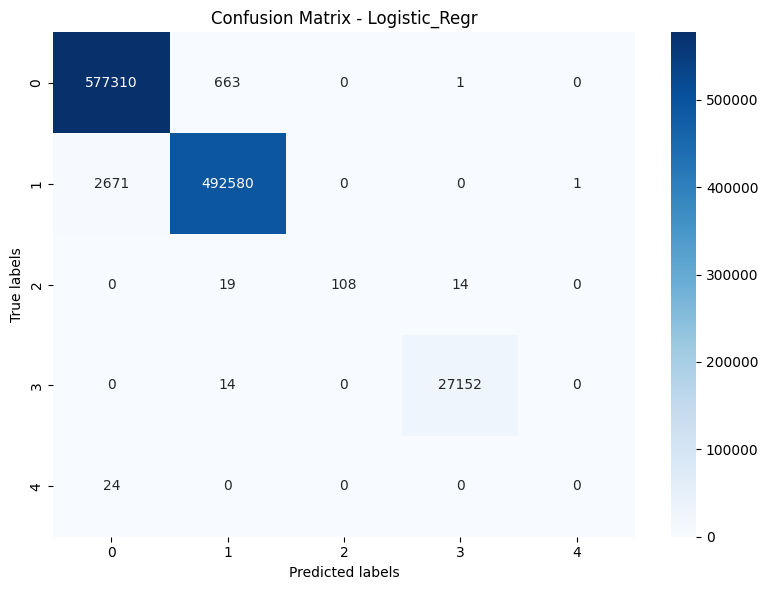

Overall Precision: 0.995722594419495
Overall Recall: 0.995722594419495
Overall FPR: 1.104224521675161e-06
Overall F1 Score: 0.995722594419495
Accuracy: 0.9999945482151311
Accuracy: 100.0
Recall: 99.57
Precision: 99.57
F1 Score: 99.57
False Positive Rate: 0.0


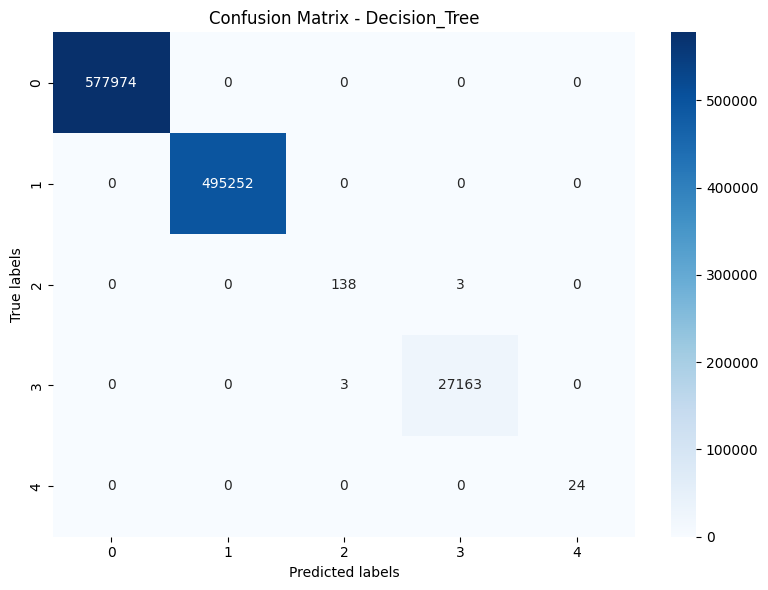

Overall Precision: 0.9972027972027971
Overall Recall: 0.9999852757122873
Overall FPR: 3.634988949633593e-07
Overall F1 Score: 0.9985841868809026
Accuracy: 0.999998182738377
Accuracy: 100.0
Recall: 100.0
Precision: 99.72
F1 Score: 99.86
False Positive Rate: 0.0


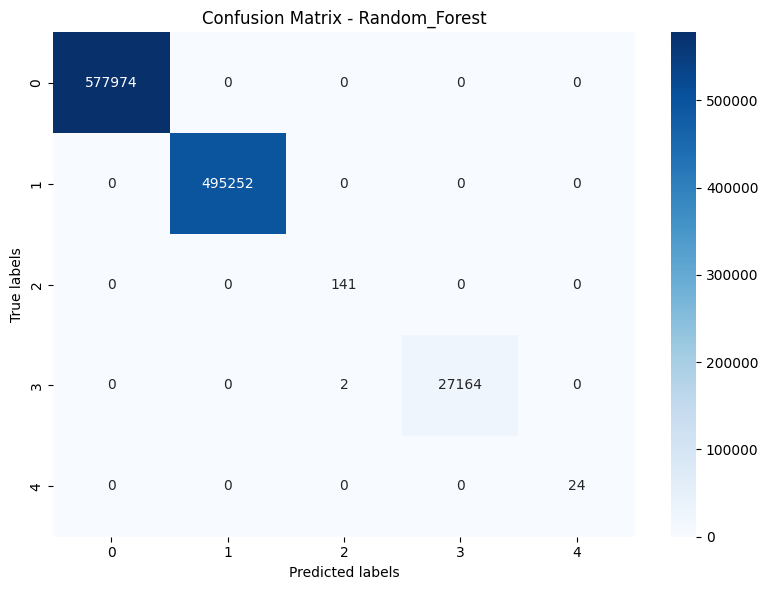

Overall Precision: 0.9972021051325383
Overall Recall: 0.9833186090456207
Overall FPR: 1.128927544575e-06
Overall F1 Score: 0.9898881886712614
Accuracy: 0.9999963654767541
Accuracy: 100.0
Recall: 98.33
Precision: 99.72
F1 Score: 98.99
False Positive Rate: 0.0


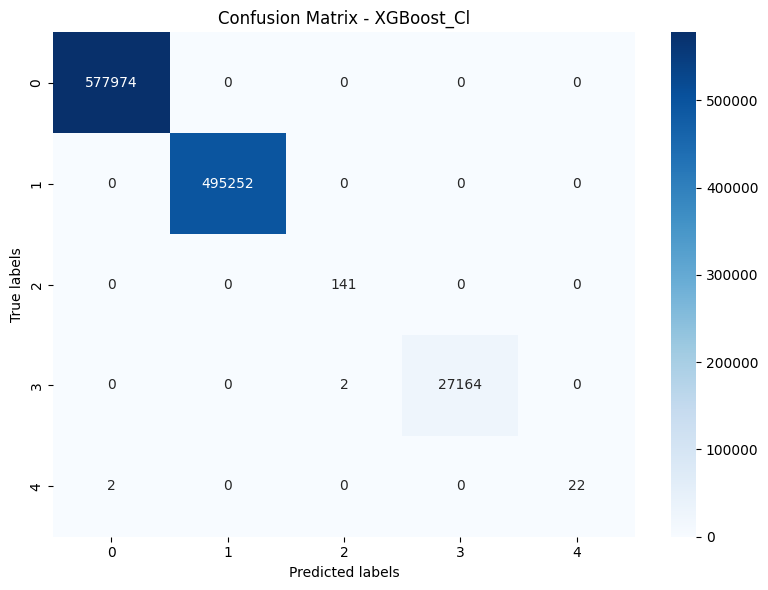

Overall Precision: 0.9837065846654951
Overall Recall: 0.9971161216151344
Overall FPR: 3.957761183968357e-06
Overall F1 Score: 0.9902916845449468
Accuracy: 0.9999854619070162
Accuracy: 100.0
Recall: 99.71
Precision: 98.37
F1 Score: 99.03
False Positive Rate: 0.0


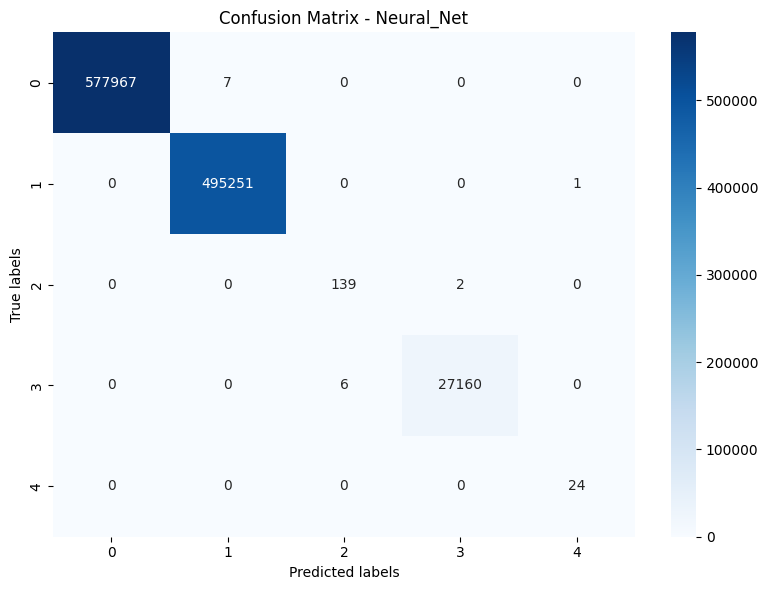

+---------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Classifier    |   Train Time(s) |   Train Accuracy |   Test Time(s) |   Test Accuracy |   Recall |   Precision |   F1Score |   FPR |
+===============+=================+==================+================+=================+==========+=============+===========+=======+
| Logistic_Regr |        832.677  |             99.7 |       0.598758 |           99.69 |    75.18 |       79.87 |    nan    |  0.13 |
+---------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Decision_Tree |         16.9447 |            100   |       0.132256 |          100    |    99.57 |       99.57 |     99.57 |  0    |
+---------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Random_Forest |        502.397  |            100   | 

In [ ]:
# Print best parameters found by GridSearchCV
for clf_name, params in best_params_multi.items():
    print(f"Best parameters for {clf_name}: {params}")

# Train classifiers with best parameters
classifiers_trained_multi = {}
for clf_name, best_params in best_params_multi.items():
    clf = classifiers_multi[clf_name]
    clf.set_params(**best_params)
    start_time = time.time()
    clf.fit(X_train_m, y_train_m)
    end_time = time.time()
    classifiers_trained_multi[clf_name] = clf
    train_time = end_time - start_time

    # Training accuracy
    train_predictions = clf.predict(X_train_m)
    train_accuracy = accuracy_score(y_train_m, train_predictions)

    # Test
    start_time = time.time()
    test_predictions = clf.predict(X_test_m)
    end_time = time.time()
    test_time = end_time - start_time
    test_accuracy = accuracy_score (y_test_m, test_predictions)

    # Evaluate classifiers on test set and generate confusion matrices
    plot_confusion_matrix(1, clf_name, y_test_m, test_predictions, title_mult, results_mult, train_time, test_time, train_accuracy, test_accuracy)


# Display results in a table
headers = ["Classifier", "Train Time(s)", "Train Accuracy", "Test Time(s)", "Test Accuracy", "Recall", "Precision", "F1Score", "FPR"]
print(tabulate(results_mult, headers=headers, tablefmt="grid"))


# Conclusions on Multiclass Classification

From the above table, you can see that the inferencing time of Neural Network based classifier is very low. But considering the Precision value and low FPR, it is best to select XGBoost classifier even for Multiclass classification.

Note: Multiclass classificatio for the network traffic really helps in identifiying the attack vectors and allows software to take appropriate action against it.


In [ ]:
print ("===== Running Binary Classification Section =====\n")

## Number of attack vectors and # of normal vectors are
print ("Number of attack vectors = ", y_test_b.sum())
print ("Number of nomral vectors = ", (y_test_b == 0).sum())
print ("\n")

results_bin = []
title_bin = "Binary Classification"

# Define classifiers
classifiers_b = {
    'Logistic_Regr': LogisticRegression(max_iter=5000),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(random_state=42),
    'XGBoost_Cl': xgb.XGBClassifier(),
    'Neural_Net': MLPClassifier(max_iter=100, random_state=42)
}

# Hyperparameter grids for GridSearchCV
param_grids_b = {
    'Logistic_Regr': {'C': [0.1, 1]},
    'Decision_Tree': {'max_depth': [3, 5, 10]},
    'Random_Forest': {'n_estimators': [50, 75, 150]},
    'XGBoost_Cl' : {'n_estimators': [150, 200], 'learning_rate': [0.1, 0.05]},
    'Neural_Net': {'hidden_layer_sizes': [(100,), (50, 50)]}
}

# Perform GridSearchCV for each classifier
best_params_b = {}

for clf_name, clf in classifiers_b.items():
    print ("Evluating best parameters for ", clf_name)
    grid_search = GridSearchCV(clf, param_grids_b[clf_name], cv=2, scoring='accuracy')
    print ("Starting to fit the grid search for ", clf_name)
    grid_search.fit(X_train_b, y_train_b)
    print ("End of grid search evaluation for ", clf_name)
    best_params_b[clf_name] = grid_search.best_params_

# Print best parameters found by GridSearchCV
for clf_name, params in best_params_b.items():
    print(f"Best parameters for {clf_name}: {params}")

===== Running Binary Classification Section =====

Number of attack vectors =  1834025
Number of nomral vectors =  236


Evluating best parameters for  Logistic_Regr
Starting to fit the grid search for  Logistic_Regr
End of grid search evaluation for  Logistic_Regr
Evluating best parameters for  Decision_Tree
Starting to fit the grid search for  Decision_Tree
End of grid search evaluation for  Decision_Tree
Evluating best parameters for  Random_Forest
Starting to fit the grid search for  Random_Forest
End of grid search evaluation for  Random_Forest
Evluating best parameters for  XGBoost_Cl
Starting to fit the grid search for  XGBoost_Cl
End of grid search evaluation for  XGBoost_Cl
Evluating best parameters for  Neural_Net
Starting to fit the grid search for  Neural_Net
End of grid search evaluation for  Neural_Net
Best parameters for Logistic_Regr: {'C': 1}
Best parameters for Decision_Tree: {'max_depth': 10}
Best parameters for Random_Forest: {'n_estimators': 50}
Best parameters for

### Using best hyperparameters for training and then testing

Best parameters for Logistic_Regr: {'C': 1}
Best parameters for Decision_Tree: {'max_depth': 10}
Best parameters for Random_Forest: {'n_estimators': 50}
Best parameters for XGBoost_Cl: {'learning_rate': 0.1, 'n_estimators': 200}
Best parameters for Neural_Net: {'hidden_layer_sizes': (50, 50)}
Training model for  Logistic_Regr using best parameters found {'C': 1}
Accuracy: 99.99
Recall: 99.99
Precision: 99.99
F1 Score: 99.99
False Positive Rate: 8.47


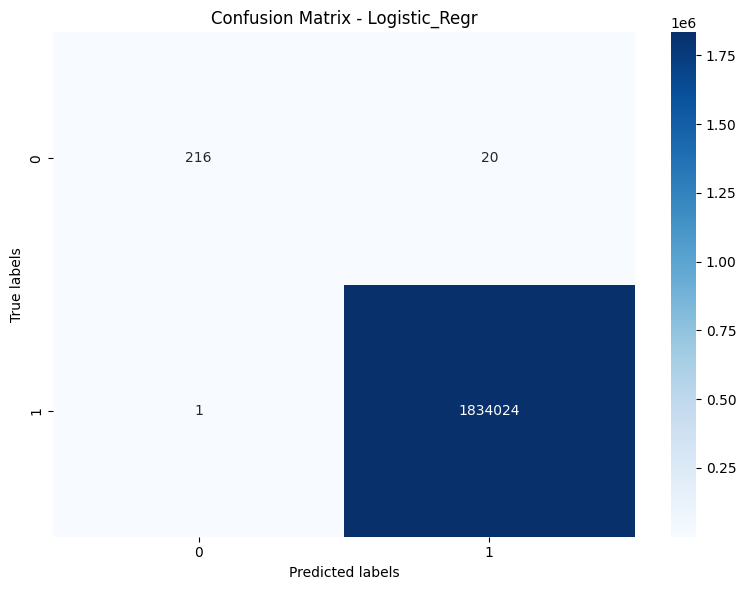

Training model for  Decision_Tree using best parameters found {'max_depth': 10}
Accuracy: 99.99
Recall: 99.99
Precision: 99.99
F1 Score: 99.99
False Positive Rate: 6.35


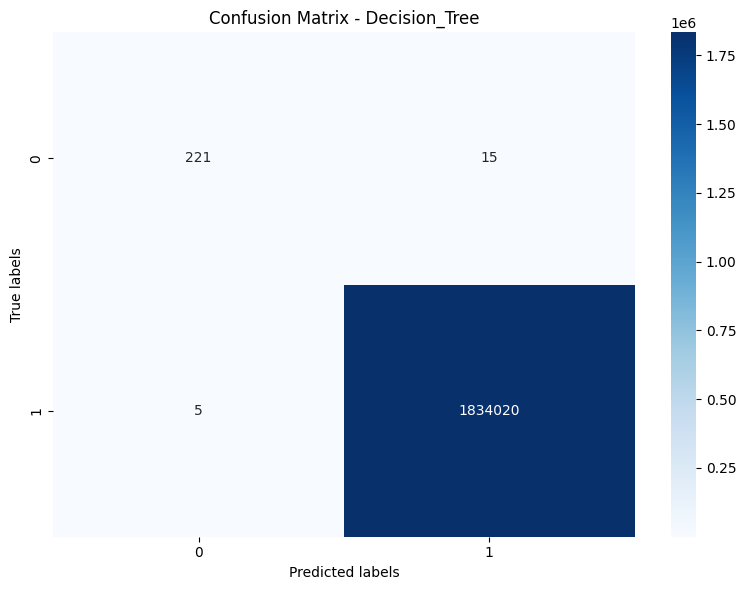

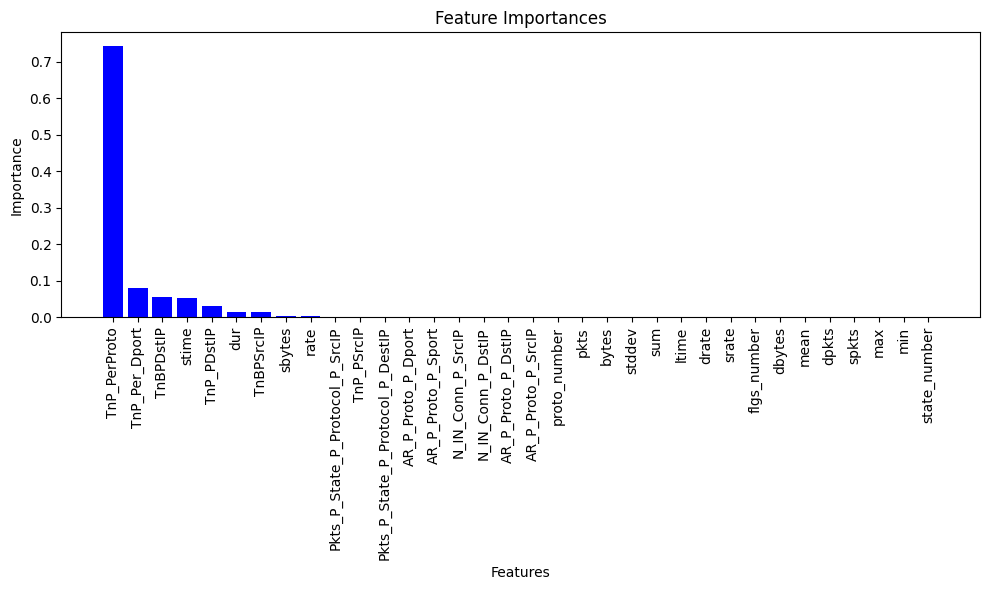

Training model for  Random_Forest using best parameters found {'n_estimators': 50}
Accuracy: 99.99
Recall: 99.99
Precision: 99.99
F1 Score: 99.99
False Positive Rate: 1.27


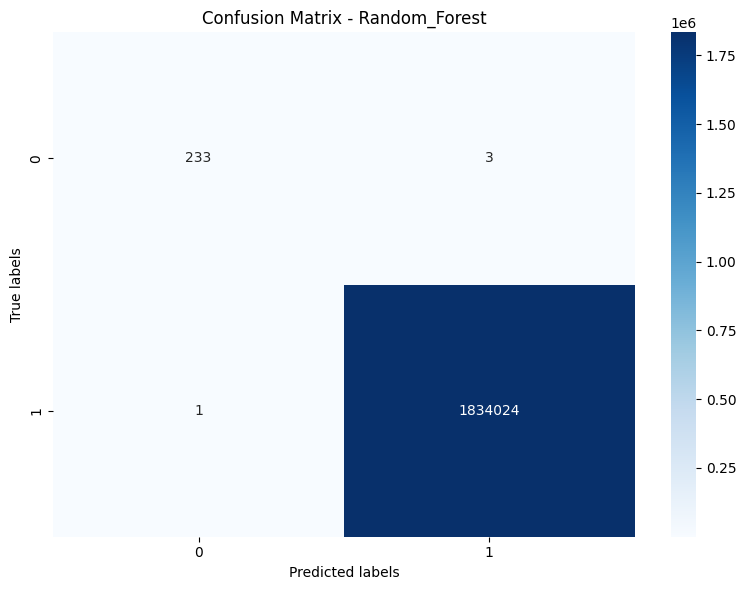

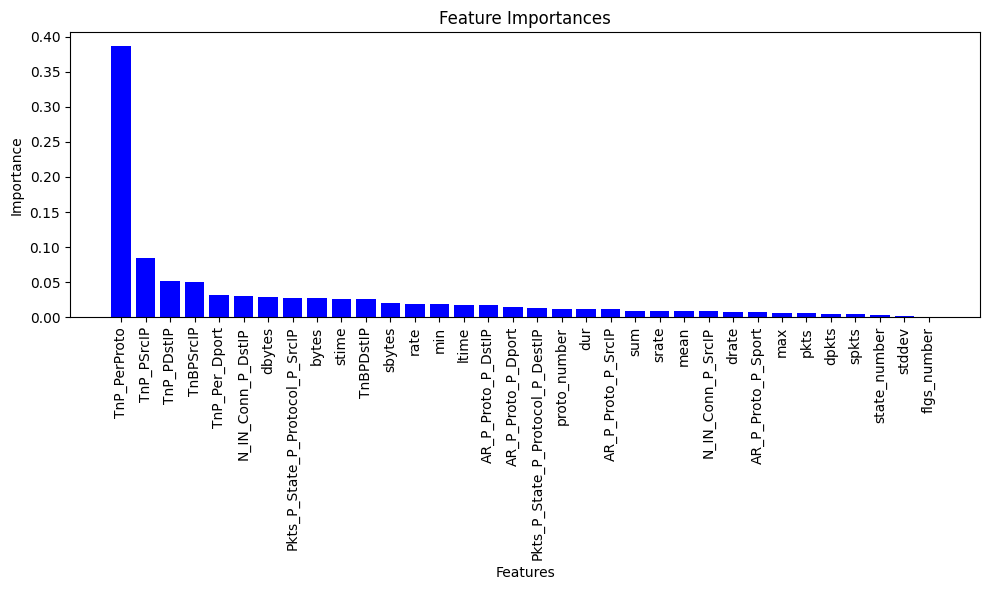

Training model for  XGBoost_Cl using best parameters found {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 99.99
Recall: 99.99
Precision: 99.99
F1 Score: 99.99
False Positive Rate: 2.11


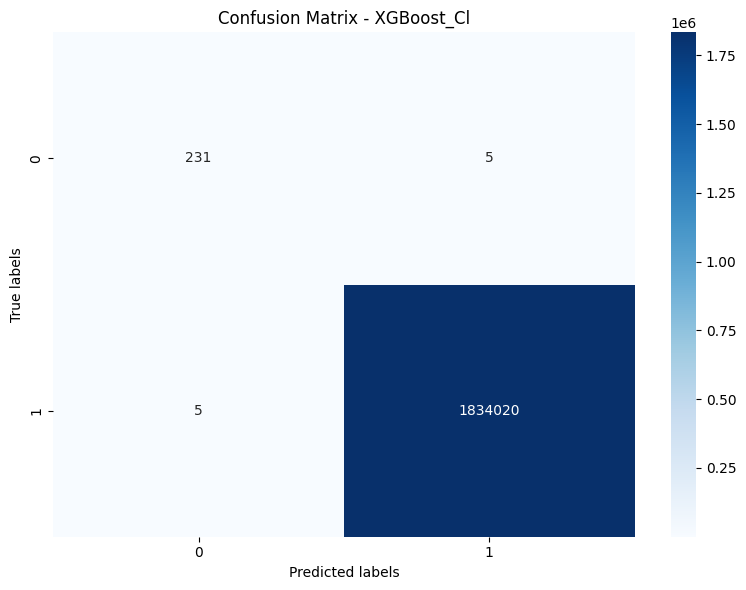

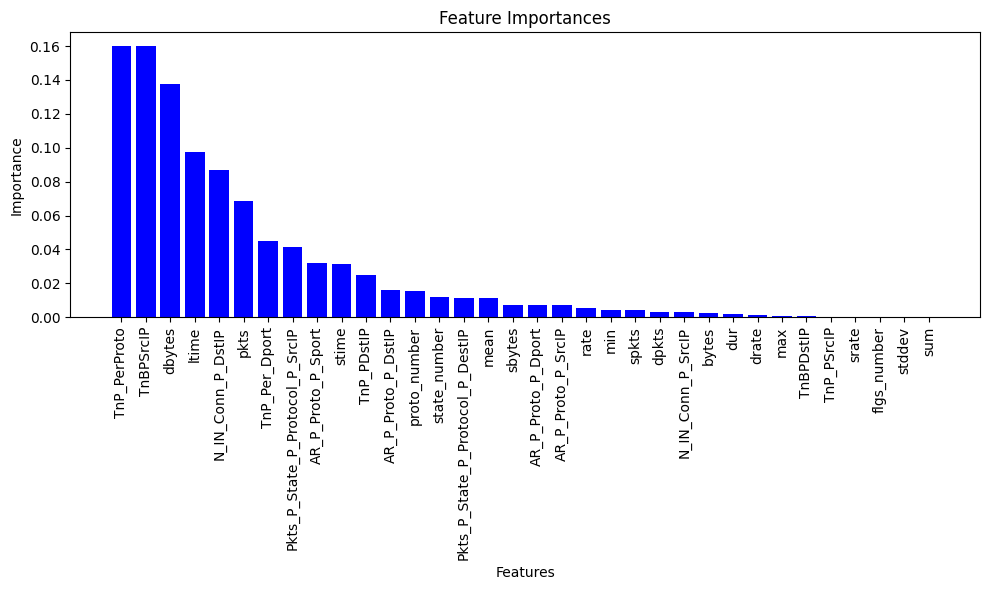

Training model for  Neural_Net using best parameters found {'hidden_layer_sizes': (50, 50)}
Accuracy: 99.99
Recall: 99.99
Precision: 99.99
F1 Score: 99.99
False Positive Rate: 2.11


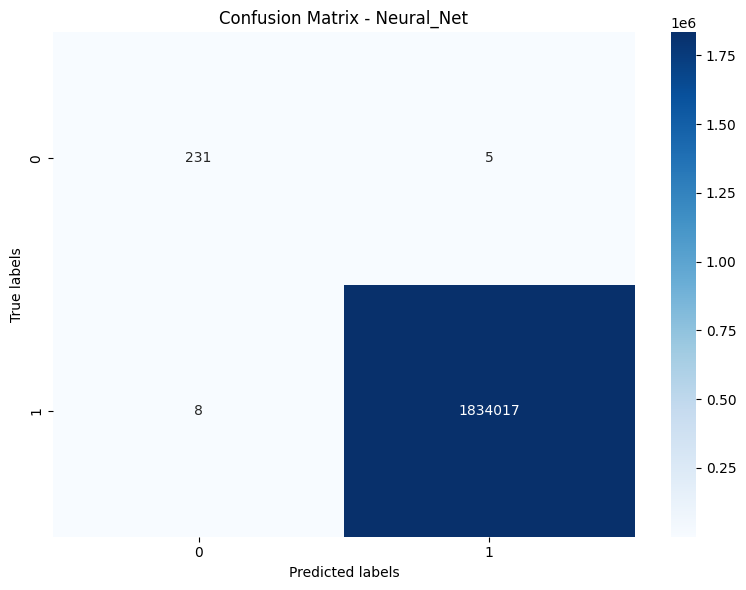

+---------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Classifier    |   Train Time(s) |   Train Accuracy |   Test Time(s) |   Test Accuracy |   Recall |   Precision |   F1Score |   FPR |
+===============+=================+==================+================+=================+==========+=============+===========+=======+
| Logistic_Regr |       101.202   |            99.99 |       0.089963 |           99.99 |    99.99 |       99.99 |     99.99 |  8.47 |
+---------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Decision_Tree |        32.927   |            99.99 |       0.19996  |           99.99 |    99.99 |       99.99 |     99.99 |  6.35 |
+---------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Random_Forest |       194.475   |           100    | 

In [ ]:
# Print best parameters found by GridSearchCV
for clf_name, params in best_params_b.items():
    print(f"Best parameters for {clf_name}: {params}")

# Train classifiers with best parameters
classifiers_trained_b = {}
for clf_name, best_params in best_params_b.items():
    print ("Training model for ", clf_name, "using best parameters found", best_params)
    clf = classifiers_b[clf_name]
    clf.set_params(**best_params)
    start_time = time.time()
    clf.fit(X_train_b, y_train_b)
    end_time = time.time()
    classifiers_trained_b[clf_name] = clf
    train_time = end_time - start_time

    # Training accuracy
    train_predictions = clf.predict(X_train_b)
    train_accuracy = accuracy_score(y_train_b, train_predictions)

    # Test
    start_time = time.time()
    test_predictions = clf.predict(X_test_b)
    end_time = time.time()
    test_time = end_time - start_time
    test_accuracy = accuracy_score (y_test_b, test_predictions)

    # Evaluate classifiers on test set and generate confusion matrices
    plot_confusion_matrix(0, clf_name, y_test_b, test_predictions, title_bin, results_bin, train_time, test_time, train_accuracy, test_accuracy)

    if((clf_name=="Decision_Tree") or (clf_name=="Random_Forest") or (clf_name=="XGBoost_Cl")) :
        feature_importances = clf.feature_importances_

        # Create a DataFrame to display feature importances
        importance_df = pd.DataFrame({'Feature': X_train_b.columns, 'Importance': feature_importances})

        # Sort the DataFrame by importance in descending order
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Print or visualize the feature importances
        #print(importance_df)

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df['Feature'], importance_df['Importance'], color='b')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title('Feature Importances')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


# Display results in a table
headers = ["Classifier", "Train Time(s)", "Train Accuracy", "Test Time(s)", "Test Accuracy", "Recall", "Precision", "F1Score", "FPR"]
print(tabulate(results_bin, headers=headers, tablefmt="grid"))

# Conclusion on Binary Classification:

From the above table, it is clear that the ensamble methods like XGBoost are better classifiers for detecting the Attack vs Non-Attack traffic due to their fast inferencing speeds and very low False Positive Rates.

